# **Unsupervised Learning in Python**

# Chap 1: Clustering for dataset exploration

## How many Clusters?

In [ ]:
#Answer
3

## Clustering 2d points

In [226]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[2 0 1 2 0 2 0 0 0 1 2 0 0 1 1 0 1 1 0 0 1 0 2 0 2 1 0 1 1 2 2 0 0 0 1 2 0
 0 2 0 1 2 2 1 2 0 1 1 0 0 0 0 1 1 2 2 1 1 1 2 2 0 0 0 2 0 1 0 2 1 2 2 2 0
 2 1 1 2 0 1 2 1 2 0 1 0 1 2 0 0 0 2 0 0 2 1 1 1 1 2 0 2 1 1 2 2 0 2 1 1 2
 1 1 1 0 0 0 0 1 1 0 2 0 1 0 2 1 0 1 1 0 1 0 1 2 0 2 2 0 1 2 0 2 2 1 0 0 2
 1 2 1 0 2 1 1 2 1 0 0 1 0 1 1 0 0 2 0 0 1 2 1 2 2 0 2 0 0 2 2 1 2 2 2 1 0
 0 2 1 2 1 1 0 0 0 2 0 0 0 1 1 2 0 2 2 2 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1
 0 0 2 1 2 2 1 2 1 2 1 0 0 1 0 0 0 1 2 2 1 0 0 1 0 1 1 0 1 1 2 1 2 2 2 0 1
 1 1 2 0 2 1 2 1 1 0 2 2 2 1 0 0 0 2 0 1 1 0 2 2 1 2 2 1 2 0 2 1 1 1 1 0 1
 1 0 0 2]


## Inspect your clustering

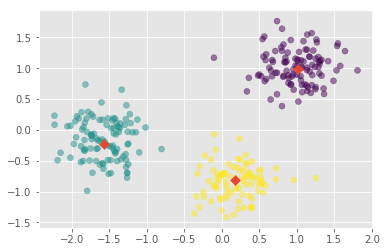

In [227]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels,alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

## How many clusters of grain?

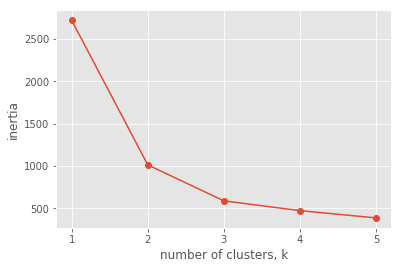

In [236]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Based on sharp decline, the best number of clusters are 3.

## Evaluating the grain clustering

In [237]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                      68           9           0
1                       0           1          60
2                       2          60          10


## Scaling fish data for clustering


In [247]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

## Clustering the fish data

In [248]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels,'species':species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0     0     20      0
1            0    17      0      0
2           34     0      0      0
3            0     0      0     14


## Clustering stocks using KMeans

In [250]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)


Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

## Which stocks move together?

In [251]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                           companies
57       0                               Exxon
44       0                        Schlumberger
53       0                       Valero Energy
35       0                            Navistar
10       0                      ConocoPhillips
12       0                             Chevron
59       1                               Yahoo
25       1                   Johnson & Johnson
20       1                          Home Depot
47       1                            Symantec
50       1  Taiwan Semiconductor Manufacturing
51       1                   Texas instruments
14       1                                Dell
30       1                          MasterCard
24       1                               Intel


# Chap 2: Visualization with hierarchical clustering and t-SNE

## How many merges?

In [ ]:
#Answer
4 merges

## Hierarchical clustering of the grain data

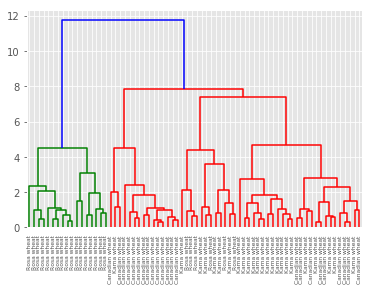

In [257]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples,method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

## Hierarchies of stocks



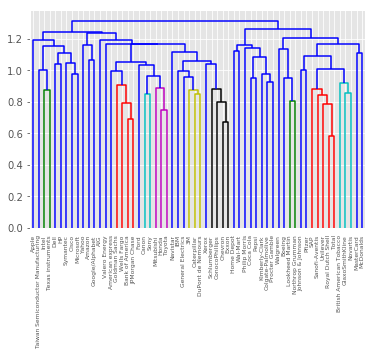

In [259]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements,method='complete')

# Plot the dendrogram
dendrogram(mergings,labels=companies,leaf_rotation=90,leaf_font_size=6)
plt.show()


## Which clusters are closest?

In [263]:
#Answer
Both A and B

## Different linkage, different hierarchical clustering!

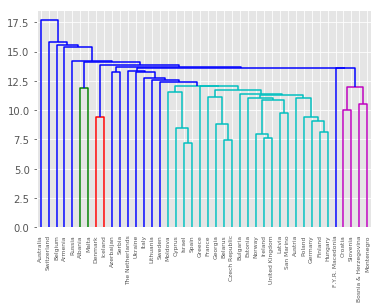

In [264]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate the linkage: mergings
mergings = linkage(samples,method='single')

# Plot the dendrogram
dendrogram(mergings,labels=country_names,leaf_rotation=90,leaf_font_size=6)
plt.show()

## Intermediate clusterings

In [ ]:
#Answer
3

## Extracting the cluster labels

In [266]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings,6,criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          17
2                      14           1           0
3                       0           6           6
4                       9          17           0


## t-SNE visualization of grain dataset

In [ ]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=variety_numbers)
plt.show()

## A t-SNE map of the stock market

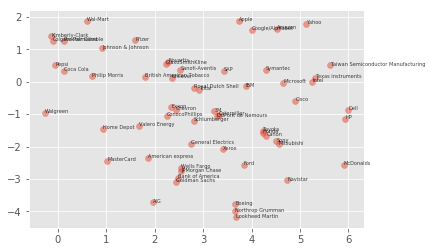

In [273]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

# Chap 3: Decorrelating your data and dimension reduction

## Correlated data in nature

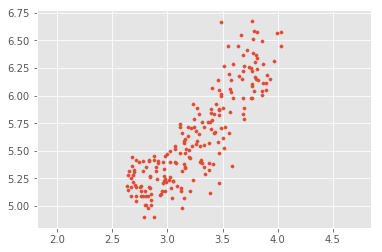

0.8604149377143467


In [282]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length, s=10)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)

## Decorrelating the grain measurements with PCA

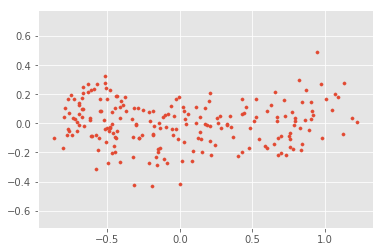

7.474656899453042e-17


In [283]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys, s=10)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

## Principal components

In [ ]:
#Answer
Both plot 1 and plot 3

## The first principal component

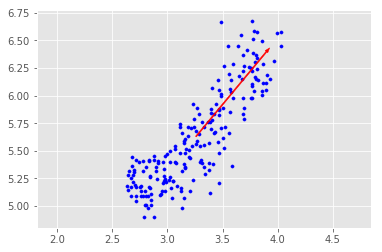

In [291]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1],c='blue',s=10)

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

## Variance of the PCA features

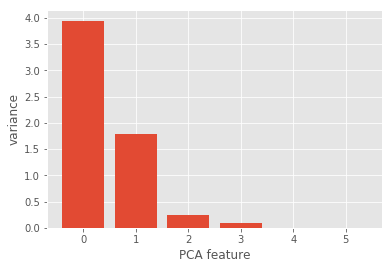

In [293]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

## Intrinsic dimension of the fish data

In [ ]:
#Answer
2

## Dimension reduction of the fish measurements

In [300]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


## A tf-idf word-frequency array

In [302]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


## Clustering Wikipedia part I

In [304]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

## Clustering Wikipedia part II

In [305]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                        article
29      0                               Jennifer Aniston
22      0                              Denzel Washington
23      0                           Catherine Zeta-Jones
24      0                                   Jessica Biel
25      0                                  Russell Crowe
26      0                                     Mila Kunis
27      0                                 Dakota Fanning
28      0                                  Anne Hathaway
21      0                             Michael Fassbender
20      0                                 Angelina Jolie
51      1                                     Nate Ruess
52      1                                     The Wanted
53      1                                   Stevie Nicks
54      1                                 Arctic Monkeys
55      1                                  Black Sabbath
56      1                                       Skrillex
57      1                      

# Chap 4: Discovering interpretable features

## Non-negative data

In [ ]:
#Answer
1 and 3

## NMF applied to Wikipedia articles


In [314]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
nmf_features = model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

[[0.         0.         0.         0.         0.         0.44051163]
 [0.         0.         0.         0.         0.         0.56666437]
 [0.0038206  0.         0.         0.         0.         0.39868864]
 [0.         0.         0.         0.         0.         0.38178   ]
 [0.         0.         0.         0.         0.         0.48556788]
 [0.01292924 0.0137895  0.00776363 0.03344801 0.         0.33455725]
 [0.         0.         0.02067527 0.         0.0060449  0.35909882]
 [0.         0.         0.         0.         0.         0.49102804]
 [0.01542761 0.01428229 0.00376652 0.02371073 0.02626214 0.48082517]
 [0.011174   0.03136899 0.03095013 0.06569876 0.01966783 0.3383245 ]]


## NMF features of the Wikipedia articles

In [315]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features,index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003846
1    0.000000
2    0.000000
3    0.575701
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422373
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


## NMF reconstructs samples

In [ ]:
#Answer
  [2.2, 1.1, 2.1]

## NMF learns topics of documents

In [321]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3,:]

# Print result of nlargest
print(component.nlargest())

(6, 13125)
film       0.627924
award      0.253150
starred    0.245303
role       0.211467
actress    0.186412
Name: 3, dtype: float64


## Explore the LED digits dataset

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


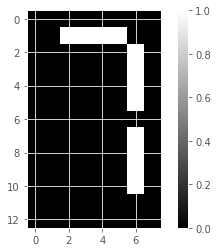

In [323]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

## NMF learns the parts of images

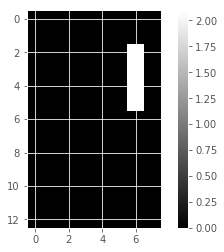

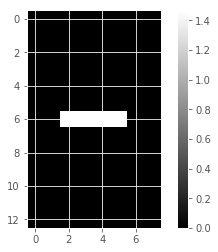

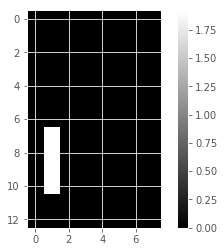

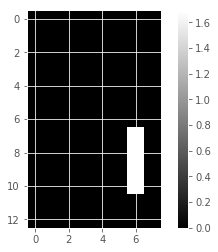

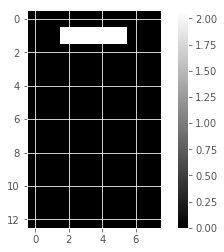

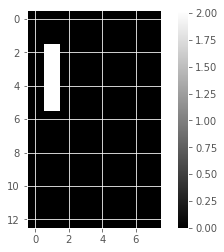

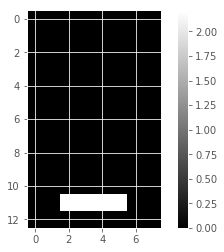

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37540618e-16]


In [325]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

## PCA doesn't learn parts

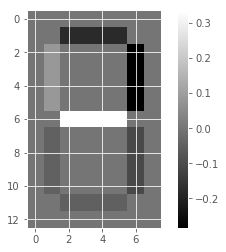

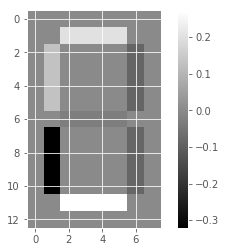

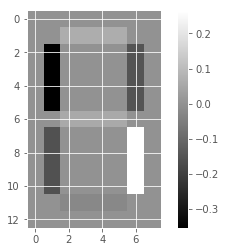

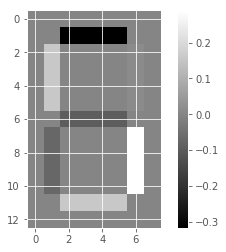

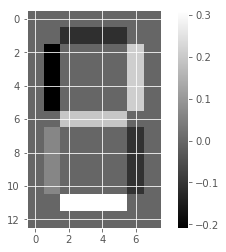

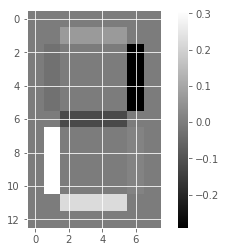

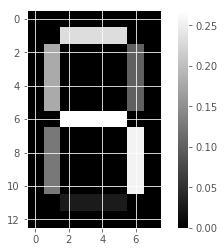

In [326]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

## Which articles are similar to 'Cristiano Ronaldo'?

In [331]:
# Perform the necessary imports
from sklearn.preprocessing import normalize
import pandas as pd

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


## Recommend musical artists part I

In [333]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler,nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

## Recommend musical artists part II

In [334]:
import pandas as pd
# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

Bruce Springsteen    1.000000
Neil Young           0.960341
Leonard Cohen        0.920403
Van Morrison         0.885800
Bob Dylan            0.869778
dtype: float64


----